In [1]:
import os

os.chdir("../../")

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_handling import ingestion

sns.set_theme(context="paper", font_scale=1.15, style="whitegrid")

In [4]:
ts_data = ingestion.read_combined().dropna()

X = ts_data.drop(columns=["consumption", "temperature"])
y = ts_data["consumption"]

# Add constant
X = sm.add_constant(X)

# Fit and summarize OLS model
model = sm.OLS(y, X)
results = model.fit()

d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     5902.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:42:48   Log-Likelihood:                -31165.
No. Observations:                2250   AIC:                         6.235e+04
Df Residuals:                    2242   BIC:                         6.239e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.467e+06   3.15e+04    141.835      0.000    4.41e+06    4.53e+06
temperature_capped -1.657e+05    843.143   -196.469      0.000   -1.67e+05   -1.64e+05
imbalance_prices   -5117.6421    349.491    -14.643      0.000   -5803.003   -4432.282
electricity_price   2058.1201    174.206     11.814      0.000    1716.498    2399.742
crude_oil_price     -390.4529    422.863     -0.923      0.356   -1219.698     438.792
eua_price            389.9971    313.562      1.244      0.214    -224.904    1004.898
storage_levels      -427.7787     96.693     -4.424      0.000    -617.396    -238.161
weekend            -2.853e+05   1.22e+04    -23.387      0.000   -3.09e+05   -2.61e+05
==============================================================================
Omnibus:                       72.287   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.921
Skew:                          -0.438   Prob(JB):                     7.29e-18
Kurtosis:                       3.273   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Linear regression of natural gas consumption')

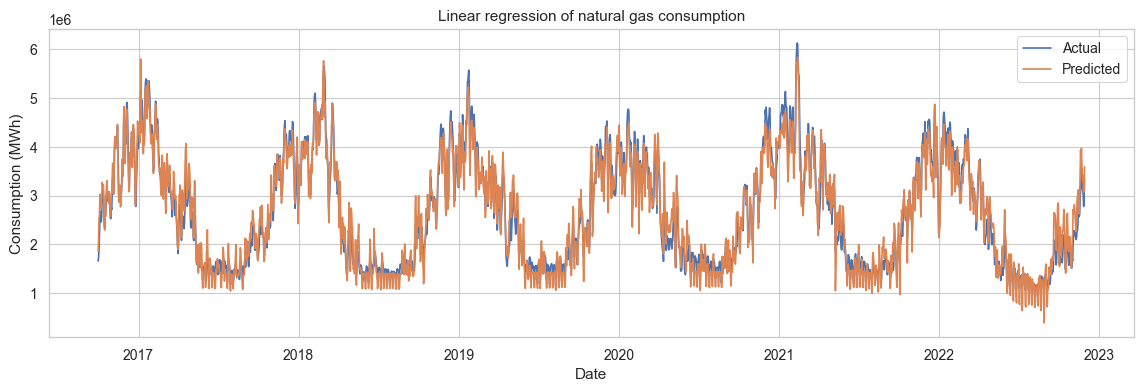

In [6]:
# Plot linear regression
regression_y = results.predict(X)

# Plot
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y, label="Actual")
ax.plot(regression_y, label="Predicted")

ax.set_xlabel("Date")
ax.set_ylabel("Consumption (MWh)")
ax.legend()
ax.set_title("Linear regression of natural gas consumption")

### Train and test set

In [7]:
X = ts_data.drop(columns=["consumption", "temperature"])
y = ts_data["consumption"]

# Add constant
X = sm.add_constant(X)

# Fit and summarize OLS model
model = sm.OLS(y[:"2021"], X[:"2021"])
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     5472.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:42:56   Log-Likelihood:                -26485.
No. Observations:                1918   AIC:                         5.299e+04
Df Residuals:                    1910   BIC:                         5.303e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.247e+06   3.65e+04    116.367      0.000    4.18e+06    4.32e+06
temperature_capped -1.655e+05    872.527   -189.624      0.000   -1.67e+05   -1.64e+05
imbalance_prices   -5673.3088    523.646    -10.834      0.000   -6700.286   -4646.332
electricity_price   2780.7090    273.067     10.183      0.000    2245.168    3316.250
crude_oil_price      919.6924    495.516      1.856      0.064     -52.117    1891.502
eua_price           1870.8142    357.750      5.229      0.000    1169.193    2572.436
storage_levels       123.6124    103.999      1.189      0.235     -80.351     327.576
weekend            -2.872e+05   1.26e+04    -22.715      0.000   -3.12e+05   -2.62e+05
==============================================================================
Omnibus:                       61.676   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.969
Skew:                          -0.408   Prob(JB):                     6.40e-16
Kurtosis:                       3.458   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Linear regression of natural gas consumption')

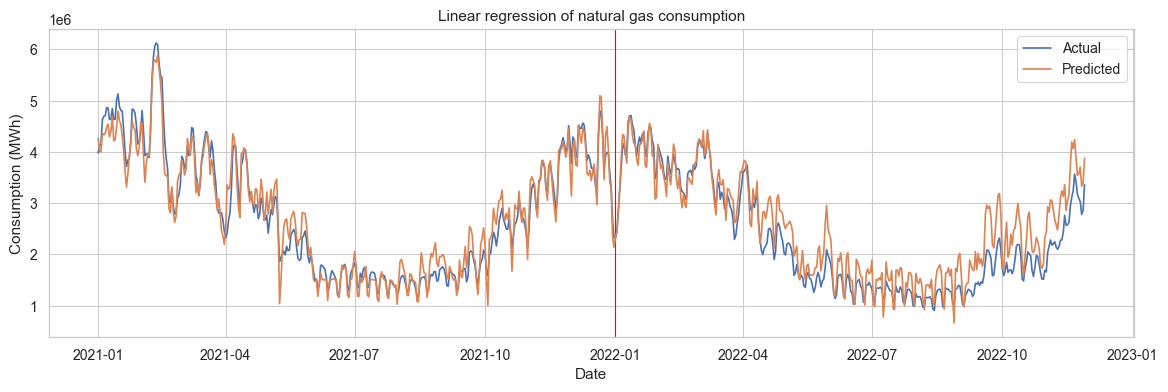

In [9]:
# Plot linear regression
regression_y = results.predict(X)

# Plot
fig, ax = plt.subplots(figsize=(14, 4))

# Vertical line indicating the training test split
ax.axvline(pd.Timestamp("2022-01-01"), color="red", linewidth=0.8)

ax.plot(y["2021":], label="Actual")
ax.plot(regression_y["2021":], label="Predicted")

ax.set_xlabel("Date")
ax.set_ylabel("Consumption (MWh)")
ax.legend()
ax.set_title("Linear regression of natural gas consumption")

Result: 2022 lower consumption of natural gas not captured by regressors